<a href="https://colab.research.google.com/github/pillaiganesh/MyAIAdventures/blob/IITB-Workshop/ANN_Health_Insurance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np # Numerical python - for matrix calculation, mathetical operations, statistical operations
import pandas as pd # To read files of different format and for pre-processing
import matplotlib.pyplot as plt # Visulation

# Keras Packages
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop # For regression model optimizer is Root Mean Square Propogation

In [3]:
insurance_data = pd.read_csv("https://github.com/ammishra08/MachineLearning/raw/master/Datasets/insurance.csv")

In [4]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance_data.isnull().sum() # For checking if there is any missing data. (Return count of missing data in each column)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Problem data: Not all the columns are numerical. Example: Sex, Smoker and Region are categorical data.

##### Data Pre-processing

In [6]:
insurance_data['sex'].unique()

array(['female', 'male'], dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder
le_encoder = LabelEncoder()
insurance_data['sex'] = le_encoder.fit_transform(insurance_data['sex']) # Female will be set to 0 and Male will be set to 1 (As per alphabetically order)

In [9]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [10]:
insurance_data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [11]:
le_encoder = LabelEncoder()
insurance_data['smoker'] = le_encoder.fit_transform(insurance_data['smoker']) # No will be set to 0 and Yes will be set to 1 (As per alphabetically order)

In [12]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [13]:
insurance_data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [16]:
le_encoder = LabelEncoder()
insurance_data['region'] = le_encoder.fit_transform(insurance_data['region']) # Since there are multiple values of the category ideally it is better to use use onehotencoder

In [17]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<Axes: >

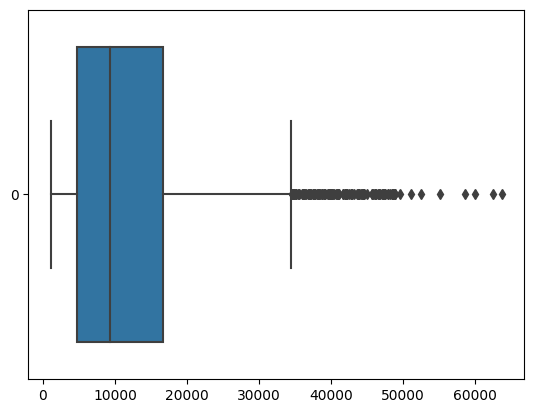

In [15]:
#remove outliers
import seaborn as sns
sns.boxplot(insurance_data['charges'], orient = 'h')

In [20]:
X = insurance_data.drop(['charges'], axis = 1)
Y = insurance_data['charges']

In [21]:
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [22]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [23]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

##### Train & Test Data

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_text,y_train,y_test = train_test_split(X,Y,test_size=0.2, random_state=3)

##### ANN Reggression Model

In [33]:
def build_model():
  model = Sequential()
  # Input Layer
  model.add(Dense(units = 128, activation = 'relu', input_shape = [len(X.keys())])) # input_shape is number of inputs
  # Hidden Layer - I
  model.add(Dense(units = 256, activation = 'relu')) # 256 is number of nurones
  # Hidden Layer - II
  model.add(Dense(units = 512, activation = 'relu'))
  # Output Layer
  model.add(Dense(units = 1))

  # Optimizer
  model.compile(loss = 'mean_squared_error', optimizer = 'RMSprop',
                metrics =['mean_squared_error', 'mean_absolute_error'])
  return model

In [34]:
model = build_model()

In [ ]:
model.fit(x_train, y_train, epochs = 600, batch_size = 30, validation_split = 0.2) # epochs means number of iterations. # batch_size is number of samples in each batch

Epoch 1/600
29/29 [==============================] - 0s 7ms/step - loss: 21910390.0000 - mean_squared_error: 21910390.0000 - mean_absolute_error: 2824.0342 - val_loss: 23885434.0000 - val_mean_squared_error: 23885434.0000 - val_mean_absolute_error: 2347.8164
Epoch 2/600
29/29 [==============================] - 0s 6ms/step - loss: 22227798.0000 - mean_squared_error: 22227798.0000 - mean_absolute_error: 2825.8398 - val_loss: 22468788.0000 - val_mean_squared_error: 22468788.0000 - val_mean_absolute_error: 3071.9182
Epoch 3/600
29/29 [==============================] - 0s 6ms/step - loss: 22646468.0000 - mean_squared_error: 22646468.0000 - mean_absolute_error: 2829.6323 - val_loss: 23693240.0000 - val_mean_squared_error: 23693240.0000 - val_mean_absolute_error: 2303.2461
Epoch 4/600
29/29 [==============================] - 0s 6ms/step - loss: 22557830.0000 - mean_squared_error: 22557830.0000 - mean_absolute_error: 2855.8333 - val_loss: 24405398.0000 - val_mean_squared_error: 24405398.0000 -